Draw the analysis graph

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.wrappers import LdaMallet

model_path = '/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/PKL/lda_model'
dictionary_path = '/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/PKL/dictionary.dict'
model_mallet_path = '/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/PKL/ldamallet.pkl'

dictionary = Dictionary.load(dictionary_path)
lda_model = LdaMallet.load(model_path)
ldamallet = LdaMallet.load(model_mallet_path)

print(dictionary)  
print(lda_model.print_topics(num_topics=5))  

Dictionary(3180 unique tokens: ['base', 'foreign', 'help', 'lot', 'maybe']...)
[(2, '0.022*"happen" + 0.017*"care" + 0.015*"fact" + 0.015*"read" + 0.012*"stop" + 0.011*"person" + 0.011*"state" + 0.011*"great" + 0.011*"literally" + 0.010*"source"'), (0, '0.025*"lot" + 0.024*"video" + 0.021*"learn" + 0.014*"language" + 0.013*"pretty" + 0.012*"hate" + 0.012*"hard" + 0.011*"word" + 0.011*"understand" + 0.011*"stuff"'), (1, '0.023*"point" + 0.022*"red" + 0.019*"talk" + 0.016*"call" + 0.015*"book" + 0.013*"censorship" + 0.012*"political" + 0.012*"power" + 0.011*"idea" + 0.011*"censor"'), (5, '0.027*"comment" + 0.022*"reddit" + 0.022*"lol" + 0.020*"fuck" + 0.019*"feel" + 0.018*"account" + 0.018*"remove" + 0.015*"shit" + 0.014*"note" + 0.013*"hear"'), (3, '0.025*"work" + 0.024*"year" + 0.017*"live" + 0.017*"world" + 0.014*"life" + 0.011*"pay" + 0.011*"day" + 0.010*"war" + 0.009*"force" + 0.008*"back"')]


In [3]:
import pandas as pd

csv_path ='/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/reddit_clean_data'  # 替换为输入数据文件路径

df = pd.read_csv(csv_path, encoding='utf-8')
df

,type,title,author,score,url,created,num_comments,subreddit,content
0,post,Rednote the chinese version of tik tok is #2 i...,GuitarIsLife02,1041,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:50:26+00:00,429.0,TheDeprogram,the people once again showing how based they c...
1,comment,Rednote the chinese version of tik tok is #2 i...,AutoModerator,1,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:50:28+00:00,NaN,TheDeprogram,subscribe the bois youtube and support the p...
2,comment,Rednote the chinese version of tik tok is #2 i...,KazVanilla,322,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:53:37+00:00,NaN,TheDeprogram,thought xiaohongshu was the chinese version lo...
3,comment,Rednote the chinese version of tik tok is #2 i...,stalbox,128,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 08:07:56+00:00,NaN,TheDeprogram,tiktokdouyin the chinese version tiktok
4,comment,Rednote the chinese version of tik tok is #2 i...,soweli_tonsi,197,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 08:01:10+00:00,NaN,TheDeprogram,goddam this bleak snapshot into the very ver...
...,...,...,...,...,...,...,...,...,...
21411,comment,CIA headquarters rn after Rednote just deprogr...,ToKeNgT,36,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 11:59:54+00:00,NaN,TheDeprogram,NaN
21412,comment,CIA headquarters rn after Rednote just deprogr...,nukefall_,10,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 13:36:19+00:00,NaN,TheDeprogram,metatitleee
21413,comment,CIA headquarters rn after Rednote just deprogr...,boopbopnotarobot,6,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 14:49:21+00:00,NaN,TheDeprogram,roll credits
21414,comment,CIA headquarters rn after Rednote just deprogr...,CarpenterCheaper,8,https://i.redd.it/v1rmi8cvv3de1.gif,2025-01-15 15:48:20+00:00,NaN,TheDeprogram,live lightiggy reaction


In [4]:
df['content'] = df['content'].fillna('')
df = df[df['content'].notna()]
df['content'] = df['content'].astype(str)

In [5]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

Calculate the sentiment score for each line's content and record the score in the sentiment score

In [ ]:
from textblob import TextBlob

def calculate_sentiment_scores(df, content_column):
    df[content_column] = df[content_column].fillna("").astype(str)
    df['sentiment_score'] = df[content_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    return df

df = calculate_sentiment_scores(df, content_column='content')

df.head()

,type,title,author,score,url,created,num_comments,subreddit,content,sentiment_score
0,post,Rednote the chinese version of tik tok is #2 i...,GuitarIsLife02,1041,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:50:26+00:00,429.0,TheDeprogram,the people once again showing how based they c...,-0.125000
1,comment,Rednote the chinese version of tik tok is #2 i...,AutoModerator,1,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:50:28+00:00,NaN,TheDeprogram,subscribe the bois youtube and support the p...,0.152525
2,comment,Rednote the chinese version of tik tok is #2 i...,KazVanilla,322,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 06:53:37+00:00,NaN,TheDeprogram,thought xiaohongshu was the chinese version lo...,0.128974
3,comment,Rednote the chinese version of tik tok is #2 i...,stalbox,128,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 08:07:56+00:00,NaN,TheDeprogram,tiktokdouyin the chinese version tiktok,0.000000
4,comment,Rednote the chinese version of tik tok is #2 i...,soweli_tonsi,197,https://i.redd.it/0ss2ep5hkpce1.jpeg,2025-01-13 08:01:10+00:00,NaN,TheDeprogram,goddam this bleak snapshot into the very ver...,-0.355000


Classify the original document based on the topic types generated by the LDA model and output each category locally.

In [7]:
import os

output_dir = "/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file"  
os.makedirs(output_dir, exist_ok=True)

lda_model = LdaMallet.load(model_path)

if 'content' not in df.columns:
    raise ValueError("content column should not be empty.")

texts = [simple_preprocess(str(content)) for content in df['content'].fillna("")]
id2word = lda_model.id2word
corpus = [id2word.doc2bow(text) for text in texts]

tm_results = lda_model[corpus]

corpus_topics = [sorted(topics, key=lambda record: -record[1])[0][0] for topics in tm_results]
df['topic'] = corpus_topics


for topic_num in sorted(df['topic'].unique()):
    topic_data = df[df['topic'] == topic_num]
    output_path = os.path.join(output_dir, f"topic_{topic_num}.csv")
    topic_data.to_csv(output_path, index=False)
    print(f"topic {topic_num} has been saved in {output_path}")

print("All saved!")

topic 0 has been saved in /Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file/topic_0.csv
topic 1 has been saved in /Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file/topic_1.csv
topic 2 has been saved in /Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file/topic_2.csv
topic 3 has been saved in /Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file/topic_3.csv
topic 4 has been saved in /Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file/topic_4.csv
topic 5 has been saved in /Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file/topic_5.csv
All saved!


Add topic column to df

In [8]:
tm_results = lda_model[corpus]

corpus_topics = [sorted(topics, key=lambda record: -record[1])[0][0] for topics in tm_results]

df['topic'] = corpus_topics

topic_names = {
    topic_num: ", ".join([term for term, _ in ldamallet.show_topic(topic_num, topn=5)])
    for topic_num in range(ldamallet.num_topics)
}

df['topic_name'] = df['topic'].map(topic_names)

print(df[['content', 'topic', 'topic_name']].head())

                                             content  topic  \
0  the people once again showing how based they c...      0   
1  subscribe  the bois  youtube and support the p...      5   
2  thought xiaohongshu was the chinese version lo...      1   
3          tiktokdouyin  the chinese version  tiktok      5   
4  goddam this   bleak snapshot into the very ver...      3   

                            topic_name  
0  lot, video, learn, language, pretty  
1     comment, reddit, lol, fuck, feel  
2         point, red, talk, call, book  
3     comment, reddit, lol, fuck, feel  
4        work, year, live, world, life  


Draw Topic frequency over time

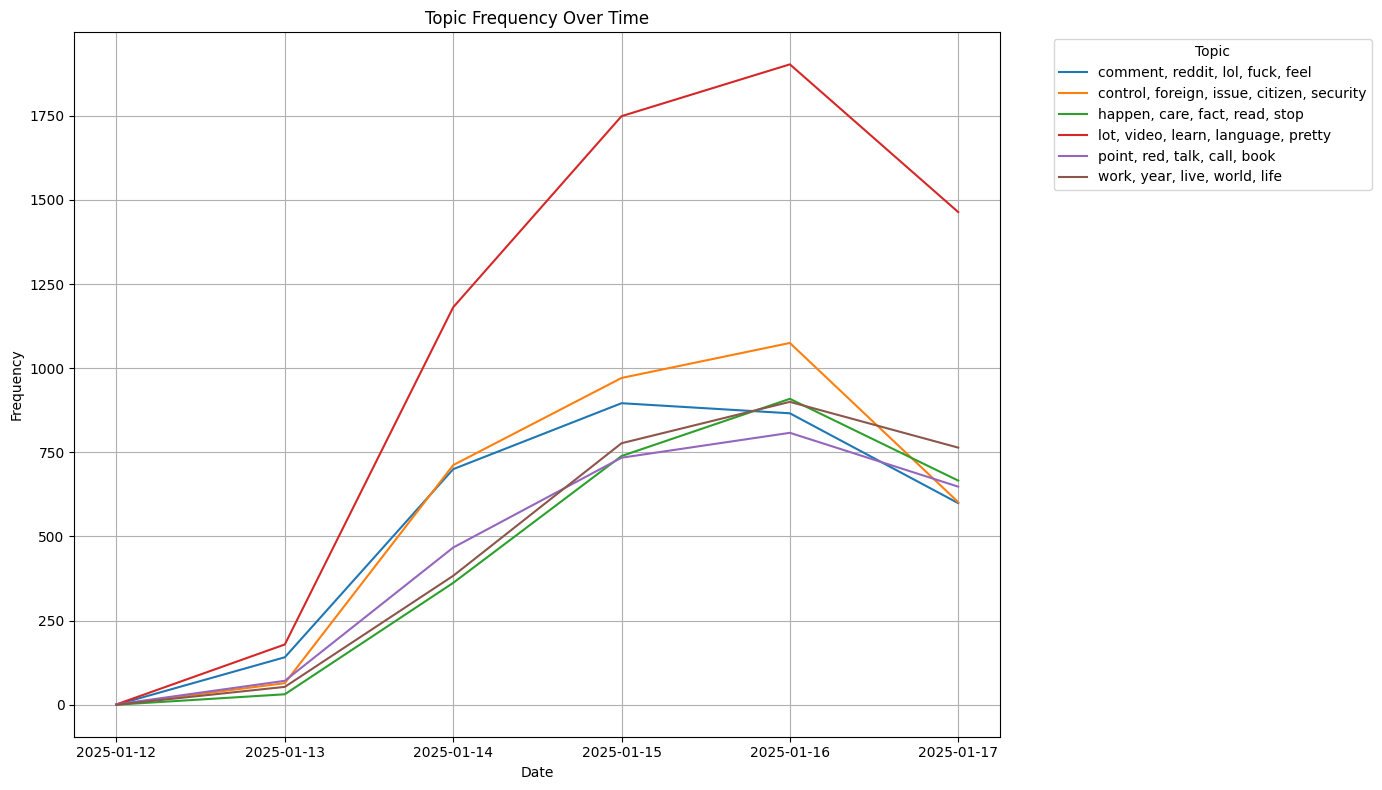

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

topic_names = {
    topic_num: ", ".join([term for term, _ in ldamallet.show_topic(topic_num, topn=5)])
    for topic_num in range(ldamallet.num_topics)
}

df['Topic_name'] = df['topic'].map(topic_names)

df['created'] = pd.to_datetime(df['created'])
df['date'] = df['created'].dt.date 

topic_time = df.groupby(['date', 'Topic_name']).size().reset_index(name='frequency')

pivot_table = topic_time.pivot(index='date', columns='Topic_name', values='frequency').fillna(0)

plt.figure(figsize=(14, 8))
pivot_table.plot(ax=plt.gca())
plt.title('Topic Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid()
plt.tight_layout()

output_path = "topic_frequency_over_time.png"
plt.savefig(output_path, dpi=300)
plt.show()

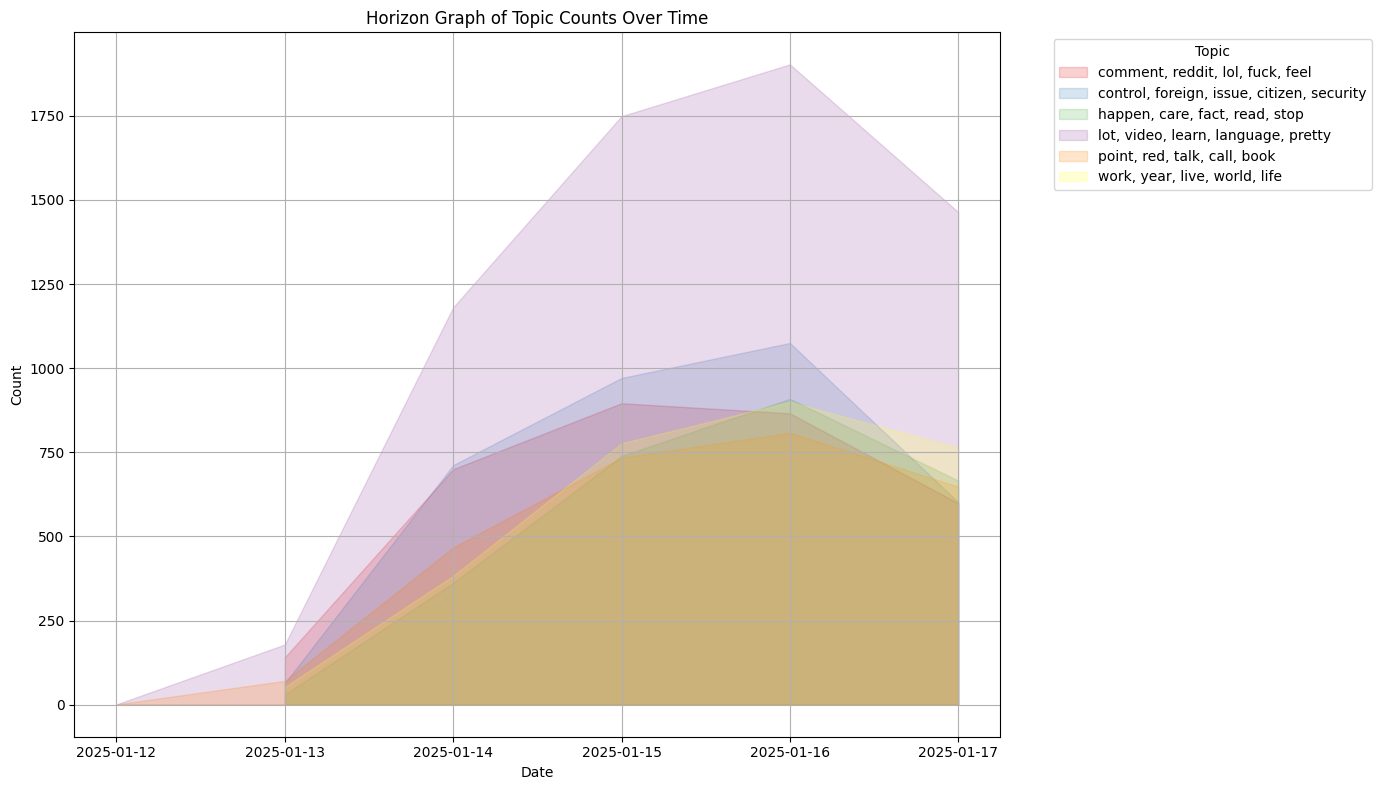

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

topic_names = {
    topic_num: ", ".join([term for term, _ in ldamallet.show_topic(topic_num, topn=5)])
    for topic_num in range(ldamallet.num_topics)
}

df['Topic_name'] = df['topic'].map(topic_names)
df['created'] = pd.to_datetime(df['created'])
df['date'] = df['created'].dt.date 

topic_time = df.groupby(['date', 'Topic_name']).size().reset_index(name='count')

pivot_table = topic_time.pivot(index='date', columns='Topic_name', values='count').fillna(0)

stacked = pivot_table.stack().reset_index()
stacked.columns = ['date', 'Topic_name', 'count']

plt.figure(figsize=(14, 8))

topics = stacked['Topic_name'].unique()
colors = sns.color_palette("Set1", len(topics)) 
for i, topic in enumerate(topics):
    subset = stacked[stacked['Topic_name'] == topic]
    plt.fill_between(
        subset['date'],
        subset['count'],
        0,
        where=subset['count'] > 0,
        color=colors[i],
        alpha=0.2,
        label=topic
    )

plt.title('Horizon Graph of Topic Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()

output_path = "horizon_graph_topic_count_over_time.png"
plt.savefig(output_path, dpi=300)
plt.show()

Analyze the key term's cluster per topic（ introtopic cluster (network)）

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from pyvis.network import Network
import community
import seaborn as sns
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import json

def load_data(file_path):
   return pd.read_csv(file_path)

def calculate_similarity(text1, text2):
   if not isinstance(text1, str) or not isinstance(text2, str):
       return 0
   words1 = set(text1.lower().split())
   words2 = set(text2.lower().split()) 
   intersection = words1.intersection(words2)
   union = words1.union(words2)
   return len(intersection) / len(union) if union else 0

def build_network(df, n_samples=100, similarity_threshold=0.1):
   sample_df = df.sample(n=min(n_samples, len(df)))
   G = nx.Graph()
   
   for idx, row in sample_df.iterrows():
       G.add_node(idx, content=row['content'], score=row['score'])
   
   for idx1, row1 in sample_df.iterrows():
       for idx2, row2 in sample_df.iterrows():
           if idx1 < idx2:
               sim = calculate_similarity(row1['content'], row2['content'])
               if sim > similarity_threshold:
                   G.add_edge(idx1, idx2, weight=sim)
   
   return G, sample_df

def analyze_clusters(G):
   communities = community.best_partition(G)
   cluster_info = []
   
   for com_id in set(communities.values()):
       com_nodes = [node for node in G.nodes() if communities[node] == com_id]
       texts = [G.nodes[node]['content'] for node in com_nodes if isinstance(G.nodes[node]['content'], str)]
       
       if texts:
           words = ' '.join(texts).lower().split()
           common_words = [word for word, count in Counter(words).most_common(5)
                         if len(word) > 3 and word not in {'this', 'that', 'with', 'have'}]
       else:
           common_words = []
           
       cluster_info.append({
           'id': com_id,
           'size': len(com_nodes),
           'keywords': common_words[:3],
           'avg_score': np.mean([G.nodes[node]['score'] for node in com_nodes])
       })
   
   return communities, cluster_info

def plot_network_static(G, title, save_path):
   plt.figure(figsize=(15, 10))
   communities = community.best_partition(G)
   
   node_colors = [communities[node] for node in G.nodes()]
   node_size = [G.nodes[node]['score']/20 + 100 for node in G.nodes()]
   
   pos = nx.spring_layout(G, k=1/np.sqrt(len(G.nodes())), iterations=50)
   
   nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
   nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_colors, cmap=plt.cm.rainbow, alpha=0.7)
   
   for com_id in set(communities.values()):
       com_nodes = [node for node in G.nodes() if communities[node] == com_id]
       if len(com_nodes) > 5:
           center_x = np.mean([pos[node][0] for node in com_nodes])
           center_y = np.mean([pos[node][1] for node in com_nodes])
           
           texts = [G.nodes[node]['content'] for node in com_nodes]
           words = ' '.join(texts).lower().split()
           common_words = [word for word in set(words) if len(word) > 3][:3]
           
           plt.text(center_x, center_y, f'Cluster {com_id}\n{", ".join(common_words)}',
                   bbox=dict(facecolor='white', alpha=0.7),
                   horizontalalignment='center')
   
   plt.title(title)
   plt.axis('off')
   plt.savefig(save_path, dpi=300, bbox_inches='tight')
   plt.close()

def create_interactive_network(G, save_path):
   # Create save directory and lib directory
   save_dir = os.path.dirname(save_path)
   lib_dir = os.path.join(save_dir, 'lib')
   if not os.path.exists(lib_dir):
       os.makedirs(lib_dir)
   
   net = Network(height='750px', width='100%', bgcolor='#ffffff', font_color='black')
   communities = community.best_partition(G)
   
   for node in G.nodes():
       net.add_node(node,
                   title=f"Score: {G.nodes[node]['score']}<br>Content: {G.nodes[node]['content'][:100]}...",
                   size=G.nodes[node]['score']/100 + 10,
                   color=f'#{"%06x" % np.random.randint(0, 0xFFFFFF)}')
   
   for edge in G.edges():
       net.add_edge(edge[0], edge[1], value=G.get_edge_data(*edge)['weight'])
   
   net.set_options("""
   var options = {
       "physics": {
           "forceAtlas2Based": {
               "gravitationalConstant": -50,
               "centralGravity": 0.01,
               "springLength": 100,
               "springConstant": 0.08
           },
           "maxVelocity": 50,
           "solver": "forceAtlas2Based",
           "timestep": 0.35,
           "stabilization": {"iterations": 150}
       }
   }
   """)
   
   net.save_graph(save_path)

'''
def analyze_topic(file_path, output_dir):
   df = load_data(file_path)
   
   stats = {
       'total_comments': len(df),
       'avg_score': df['score'].mean(),
       'max_score': df['score'].max(),
       'top_comments': df.nlargest(5, 'score')[['content', 'score']].to_dict('records')
   }
   
   G, sample_df = build_network(df)
   communities, cluster_info = analyze_clusters(G)
   
   network_stats = {
       'nodes': G.number_of_nodes(),
       'edges': G.number_of_edges(),
       'avg_degree': np.mean([d for n, d in G.degree()]),
       'clusters': cluster_info
   }
   
   topic_name = os.path.basename(file_path).split('.')[0]
   results = {
       'basic_stats': stats,
       'network_stats': network_stats
   }
   
   with open(os.path.join(output_dir, f'{topic_name}_analysis.json'), 'w') as f:
       json.dump(results, f, indent=4)
       
   plot_network_static(G, f'Network Analysis - {topic_name}', 
                      os.path.join(output_dir, f'{topic_name}_network.png'))
   create_interactive_network(G, os.path.join(output_dir, f'{topic_name}_network.html'))
   
   return results
'''

def analyze_topic(file_path, output_dir):
    def convert_numpy(obj):
        """
        Recursively convert numpy data types to Python native types.
        """
        if isinstance(obj, dict):
            return {key: convert_numpy(value) for key, value in obj.items()}
        elif isinstance(obj, list):
            return [convert_numpy(item) for item in obj]
        elif isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        return obj

    # Load data
    df = load_data(file_path)

    # Basic statistics
    stats = {
        'total_comments': len(df),
        'avg_score': float(df['score'].mean()),
        'max_score': float(df['score'].max()),
        'top_comments': df.nlargest(5, 'score')[['content', 'score']].to_dict('records')
    }

    # Build network
    G, sample_df = build_network(df)
    communities, cluster_info = analyze_clusters(G)

    # Network statistics
    network_stats = {
        'nodes': G.number_of_nodes(),
        'edges': G.number_of_edges(),
        'avg_degree': float(np.mean([d for n, d in G.degree()])),
        'clusters': cluster_info
    }

    topic_name = os.path.basename(file_path).split('.')[0]
    results = {
        'basic_stats': stats,
        'network_stats': network_stats
    }

    # Convert all numpy data types to native Python types
    results = convert_numpy(results)

    # Save JSON results
    with open(os.path.join(output_dir, f'{topic_name}_analysis.json'), 'w') as f:
        json.dump(results, f, indent=4)

    # Save visualizations
    plot_network_static(G, f'Network Analysis - {topic_name}', 
                        os.path.join(output_dir, f'{topic_name}_network.png'))
    create_interactive_network(G, os.path.join(output_dir, f'{topic_name}_network.html'))

    return results

def create_interactive_network(G, save_path):
    net = Network(notebook=True, cdn_resources='remote')
    communities = community.best_partition(G)
    
    # 修改节点显示
    for node in G.nodes():
        node_data = G.nodes[node]
        score = node_data.get('score', 0)
        content = str(node_data.get('content', ''))
        
        title = f"""
        <div style='max-width:400px; white-space:normal; font-size:12px;'>
            <b>Score: {score}</b><br><br>
            {content}
        </div>
        """

        net.add_node(str(node),
                    title=title,
                    size=score/10 + 30, 
                    label=f"Score: {score}", 
                    color=f'#{"%06x" % np.random.randint(0, 0xFFFFFF)}')
    
    # 其他代码保持不变
    
    for edge in G.edges():
        net.add_edge(str(edge[0]), str(edge[1]), value=G.get_edge_data(*edge)['weight'])
    
    net.set_options("""
    var options = {
        "physics": {
            "forceAtlas2Based": {
                "gravitationalConstant": -50,
                "centralGravity": 0.01,
                "springLength": 100,
                "springConstant": 0.08
            },
            "maxVelocity": 50,
            "solver": "forceAtlas2Based",
            "timestep": 0.35,
            "stabilization": {"iterations": 150}
        }
    }
    """)
    
    os.makedirs(os.path.dirname(os.path.abspath(save_path)), exist_ok=True)
    net.write_html(save_path)
    
def main():
   base_dir = '/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/terms_cluster_per_topic'
   topic_files = [f for f in os.listdir(base_dir) if f.startswith('topic_') and f.endswith('.csv')]
   
   all_results = {}
   for file in topic_files:
       print(f"\nAnalyzing {file}...")
       file_path = os.path.join(base_dir, file)
       results = analyze_topic(file_path, base_dir)
       all_results[file] = results
       
       print(f"Total comments: {results['basic_stats']['total_comments']}")
       print(f"Average score: {results['basic_stats']['avg_score']:.2f}")
       print(f"Number of clusters: {len(results['network_stats']['clusters'])}")
       print("\nTop clusters:")
       for cluster in results['network_stats']['clusters']:
           print(f"Cluster {cluster['id']}: {cluster['size']} nodes, Keywords: {', '.join(cluster['keywords'])}")
   
   with open(os.path.join(base_dir, 'overall_analysis.json'), 'w') as f:
       json.dump(all_results, f, indent=4)

if __name__ == "__main__":
   main()

Draw sentiment score Over time with trendline

/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_9900/3791188708.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hour'] = df[date_column].dt.floor('H')  # 提取每小时时间段


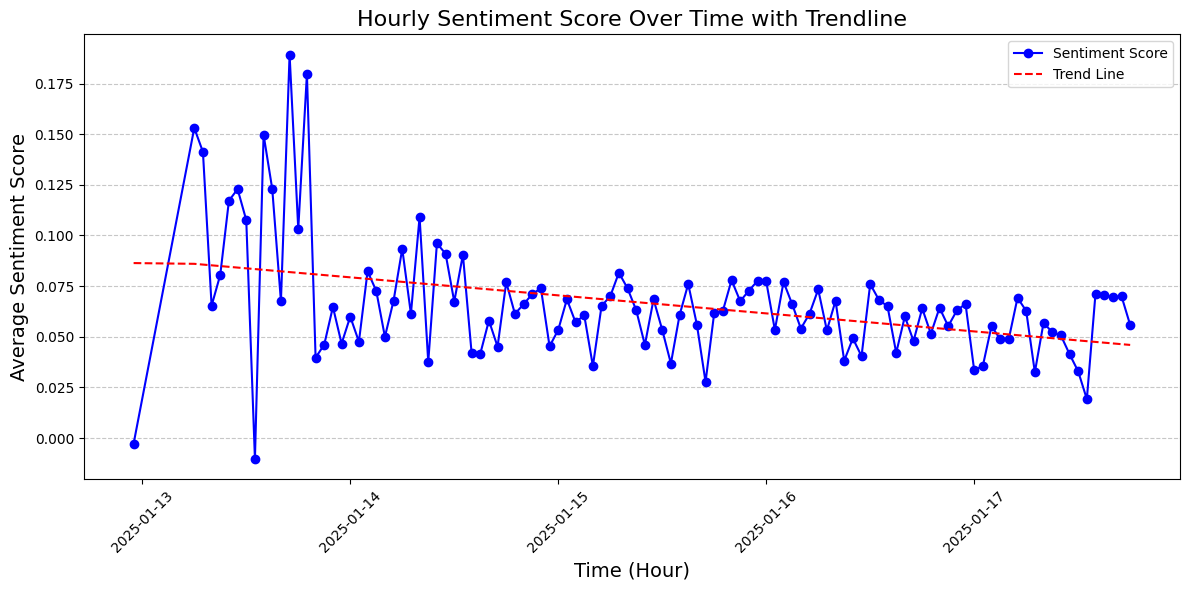

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np

def aggregate_hourly_sentiment(df, date_column, score_column):
    df[date_column] = pd.to_datetime(df[date_column]) 
    df['hour'] = df[date_column].dt.floor('H')  
    hourly_sentiment = df.groupby('hour')[score_column].mean().reset_index()
    return hourly_sentiment

def plot_hourly_sentiment_with_trendline(hourly_sentiment, time_column, score_column):
    plt.figure(figsize=(12, 6))
    
    plt.plot(hourly_sentiment[time_column], hourly_sentiment[score_column], marker='o', linestyle='-', color='b', label='Sentiment Score')
    
    x = np.arange(len(hourly_sentiment[time_column]))
    y = hourly_sentiment[score_column].values
    z = np.polyfit(x, y, 1) 
    trendline = np.poly1d(z)
    plt.plot(hourly_sentiment[time_column], trendline(x), linestyle='--', color='r', label='Trend Line')
    
    plt.title('Hourly Sentiment Score Over Time with Trendline', fontsize=16)
    plt.xlabel('Time (Hour)', fontsize=14)
    plt.ylabel('Average Sentiment Score', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main(df, content_column='content', date_column='created'):
    df['sentiment_score'] = df[content_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    hourly_sentiment = aggregate_hourly_sentiment(df, date_column, 'sentiment_score')
    plot_hourly_sentiment_with_trendline(hourly_sentiment, time_column='hour', score_column='sentiment_score')

main(df, content_column='content', date_column='created')

Daily semtiment score over time per topic

/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_9900/2965823719.py:32: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['time'] = df[date_column].dt.to_period(time_unit)  # 转为时间段
/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_9900/2965823719.py:32: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['time'] = df[date_column].dt.to_period(time_unit)  # 转为时间段
/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_9900/2965823719.py:32: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['time'] = df[date_column].dt.to_period(time_unit)  # 转为时间段
/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_9900/2965823719.py:32: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['time'] = df[date_column].dt.to_period(time_unit)  # 转为时间段
/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T

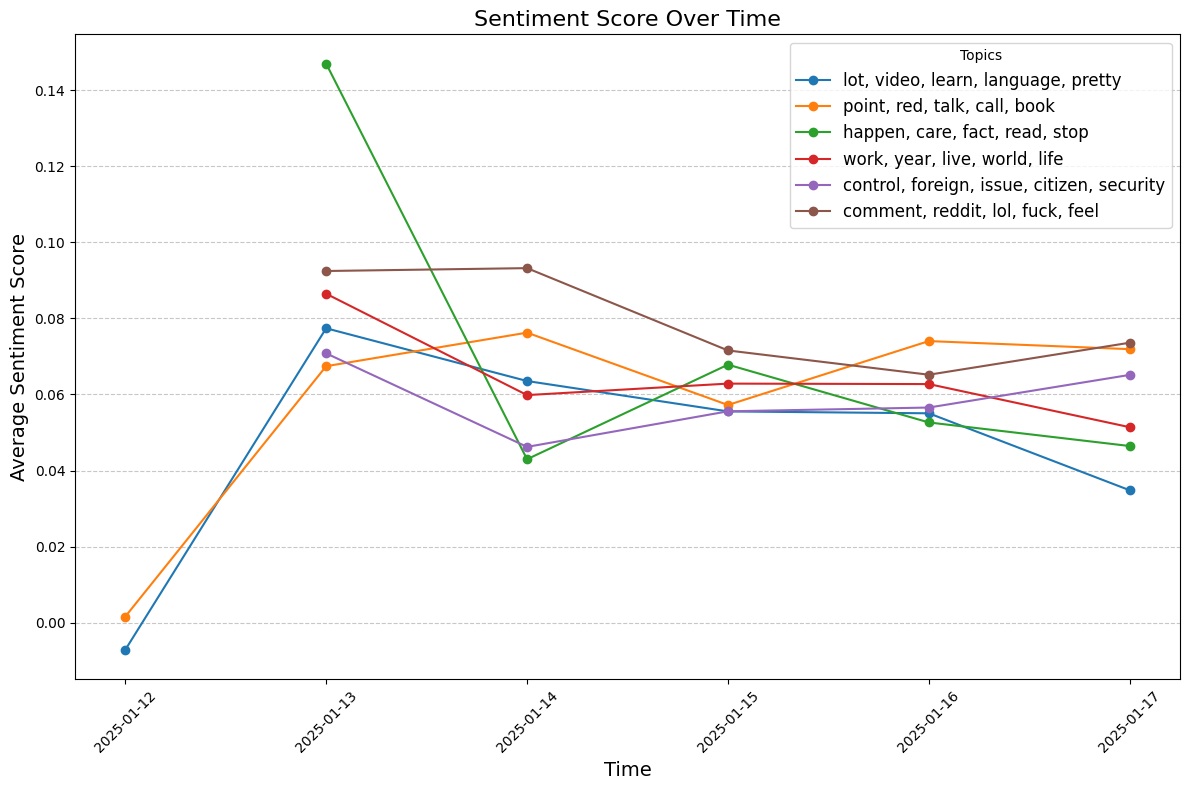

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def extract_topic_names(lda_model, n_topics, topn=5):
    """
	•	lda_model: The trained LDA model.
	•	n_topics (int): Number of topics.
	•	topn (int): Number of keywords for each topic.
    """
    topic_names = []
    for topic_id in range(n_topics):
        # 提取主题的前几个关键词
        words = [word for word, _ in lda_model.show_topic(topic_id, topn=topn)]
        topic_names.append(", ".join(words))  # 将关键词拼接成名称
    return topic_names

def load_and_process_csv(file_paths, date_column, score_column, time_unit='D'):
    """
	•	file_paths (list): List of CSV file paths.
	•	date_column (str): Name of the date column.
	•	score_column (str): Name of the sentiment score column.
	•	time_unit (str): Time unit for aggregation (‘H’ for hour, ‘D’ for day, etc.).
    """
    aggregated_data = {}
    
    for file_path in file_paths:
        # 加载数据
        df = pd.read_csv(file_path)
        df[date_column] = pd.to_datetime(df[date_column])  # 确保日期列为 datetime 格式
        
        # 按时间聚合情感分数
        df['time'] = df[date_column].dt.to_period(time_unit)  # 转为时间段
        agg_df = df.groupby('time')[score_column].mean().reset_index()
        agg_df['time'] = agg_df['time'].dt.to_timestamp()  # 转回时间戳
        aggregated_data[file_path] = agg_df
    
    return aggregated_data

def plot_combined_sentiment(aggregated_data, time_column, score_column, topic_names):
    """
	•	aggregated_data (dict): Time-aggregated data for each file.
	•	time_column (str): Name of the time column.
	•	score_column (str): Name of the sentiment score column.
	•	topic_names (list): List of topic names generated by the LDA model.
    """
    plt.figure(figsize=(12, 8))
    
    # 遍历数据，为每个文件绘图并设置图例
    for i, (file_path, data) in enumerate(aggregated_data.items()):
        label = topic_names[i] if i < len(topic_names) else f"Topic{i}"  # 映射主题名称
        plt.plot(data[time_column], data[score_column], marker='o', label=label)
    
    # 图表设置
    plt.title('Sentiment Score Over Time', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Average Sentiment Score', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Topics', fontsize=12)
    plt.tight_layout()
    plt.show()

n_topics = 6
topic_names = extract_topic_names(lda_model=lda_model, n_topics=n_topics, topn=5)

file_paths = [
    '/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file/topic_0.csv',
    '/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file/topic_1.csv',
    '/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file/topic_2.csv',
    '/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file/topic_3.csv',
    '/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file/topic_4.csv',
    '/Users/sakice/Library/Mobile Documents/com~apple~CloudDocs/Documents/DP/analysis_notebook/topic_csv_file/topic_5.csv'
]  # 替换为实际文件路径

aggregated_data = load_and_process_csv(
    file_paths=file_paths, 
    date_column='created', 
    score_column='sentiment_score', 
    time_unit='D'  # 按天聚合
)

plot_combined_sentiment(aggregated_data, time_column='time', score_column='sentiment_score', topic_names=topic_names)

Sentiment score distribution

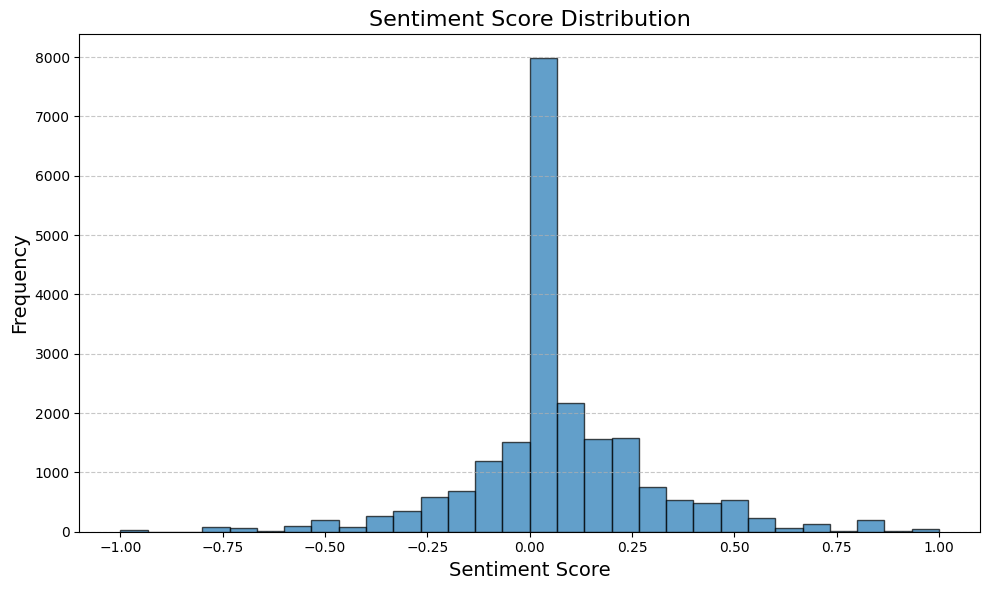

In [14]:
import matplotlib.pyplot as plt

def plot_sentiment_distribution(df, score_column='sentiment_score', bins=30):
    plt.figure(figsize=(10, 6))
    plt.hist(df[score_column], bins=bins, edgecolor='black', alpha=0.7)
    plt.title('Sentiment Score Distribution', fontsize=16)
    plt.xlabel('Sentiment Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 示例调用
# 假设 df 是包含 sentiment_score 列的 DataFrame
plot_sentiment_distribution(df, score_column='sentiment_score')

Sentiment Score Distribution by Topic

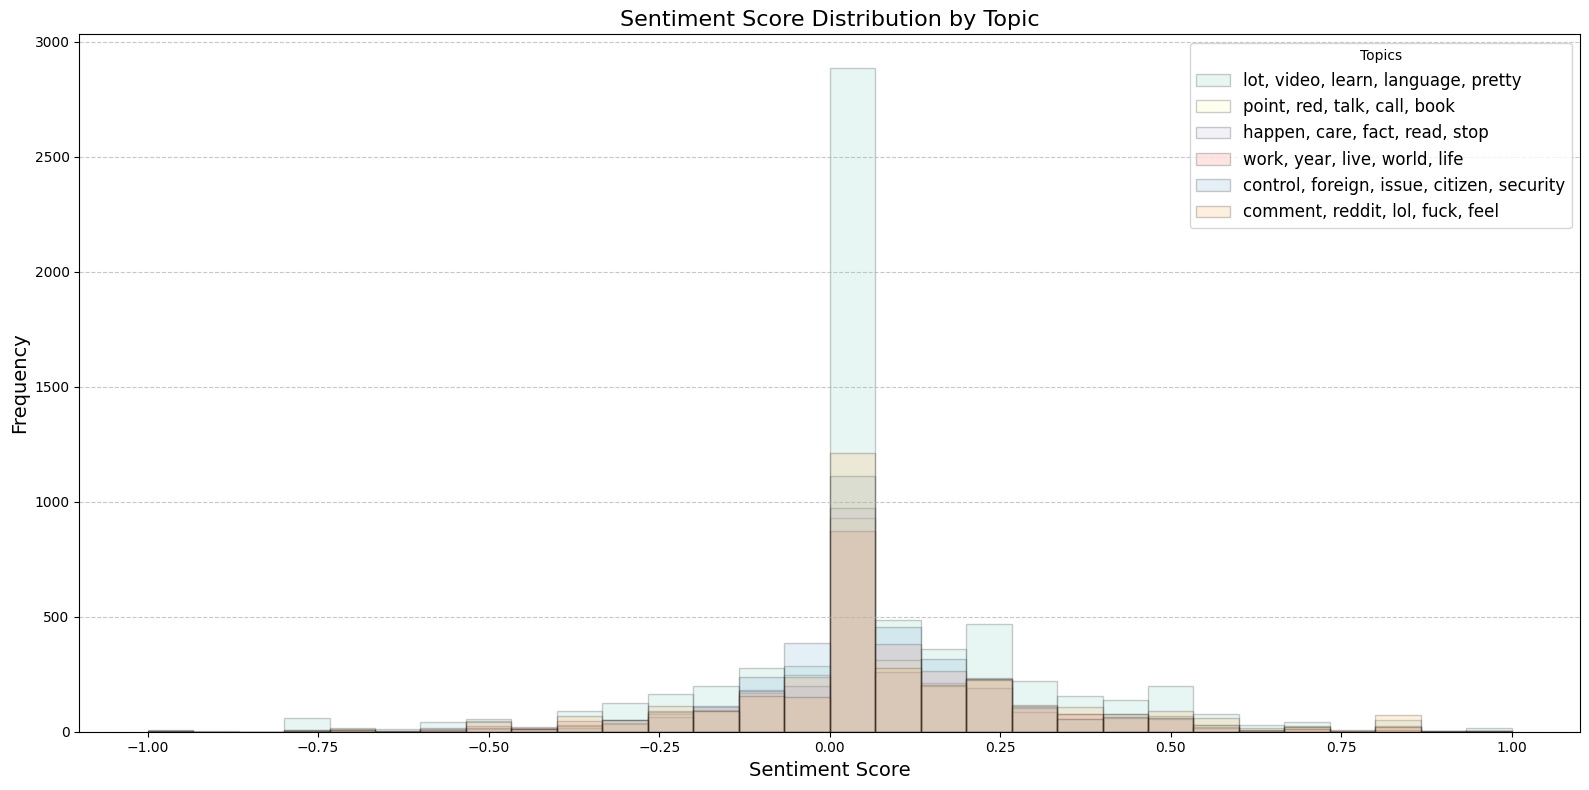

In [ ]:
import matplotlib.pyplot as plt

def extract_topic_names(lda_model, n_topics, topn=5):
    """
	•	lda_model: The trained LDA model.
	•	n_topics (int): Number of topics.
	•	topn (int): Number of keywords for each topic.
    """
    topic_names = {}
    for topic_id in range(n_topics):
        words = [word for word, _ in lda_model.show_topic(topic_id, topn=topn)]
        topic_names[topic_id] = ", ".join(words)  # Concatenate keywords into topic names.
    return topic_names

def plot_topic_sentiment_distributions(df, lda_model, topic_column='topic', score_column='sentiment_score', n_topics=6, bins=30, topn=5):
    """
	•	df (pd.DataFrame): A DataFrame containing topics and sentiment scores.
	•	lda_model: The trained LDA model.
	•	topic_column (str): Name of the column storing the primary topic of the documents.
	•	score_column (str): Name of the column storing the sentiment scores of the documents.
	•	n_topics (int): Number of topics.
	•	bins (int): Number of bins for the histogram.
	•	topn (int): Number of keywords for each topic.
    """
    topic_names = extract_topic_names(lda_model, n_topics, topn)

    plt.figure(figsize=(16, 8))
    colors = plt.cm.Set3(range(n_topics)) 

    for topic_id in range(n_topics):
        topic_data = df[df[topic_column] == topic_id][score_column]
        label = topic_names.get(topic_id, f'Topic {topic_id}')
        plt.hist(
            topic_data,
            bins=bins,
            alpha=0.2,
            label=label,
            color=colors[topic_id],
            edgecolor='black'
        )


    plt.title('Sentiment Score Distribution by Topic', fontsize=16)
    plt.xlabel('Sentiment Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend(title='Topics', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_topic_sentiment_distributions(
    df, 
    lda_model=lda_model, 
    topic_column='topic', 
    score_column='sentiment_score', 
    n_topics=6, 
    bins=30, 
    topn=5  # Top 5 keywords for each topic
)

/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_9900/875397818.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_9900/875397818.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_9900/875397818.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_9900/875397818.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.k

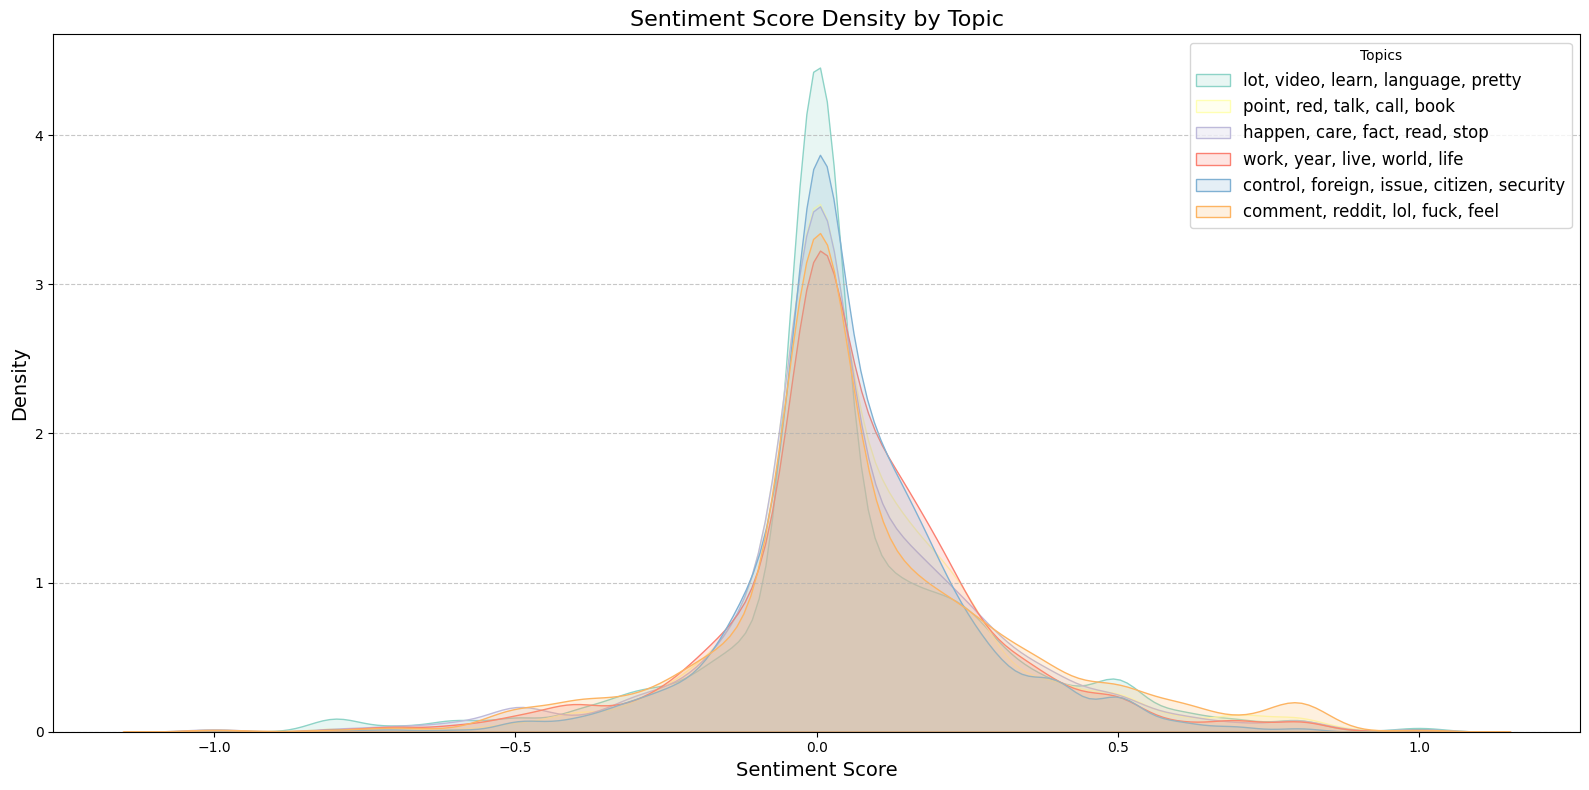

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def extract_topic_names(lda_model, n_topics, topn=5):
    """
	•	lda_model: The trained LDA model.
	•	n_topics (int): Number of topics.
	•	topn (int): Number of keywords for each topic.
    """
    topic_names = {}
    for topic_id in range(n_topics):
        words = [word for word, _ in lda_model.show_topic(topic_id, topn=topn)]
        topic_names[topic_id] = ", ".join(words)  # 将关键词拼接成主题名称
    return topic_names

def plot_topic_sentiment_density(df, lda_model, topic_column='topic', score_column='sentiment_score', n_topics=6, topn=5):
    """
	•	df (pd.DataFrame): A DataFrame containing topics and sentiment scores.
	•	lda_model: The trained LDA model.
	•	topic_column (str): Name of the column storing the primary topic of the documents.
	•	score_column (str): Name of the column storing the sentiment scores of the documents.
	•	n_topics (int): Number of topics.
	•	topn (int): Number of keywords for each topic.
    """
    topic_names = extract_topic_names(lda_model, n_topics, topn)

    plt.figure(figsize=(16, 8))
    colors = sns.color_palette("Set3", n_topics)  

    for topic_id in range(n_topics):
        topic_data = df[df[topic_column] == topic_id][score_column]
        label = topic_names.get(topic_id, f'Topic {topic_id}')
        sns.kdeplot(
            topic_data,
            shade=True,
            alpha=0.2,
            label=label,
            color=colors[topic_id]
        )

    plt.title('Sentiment Score Density by Topic', fontsize=16)
    plt.xlabel('Sentiment Score', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(title='Topics', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_topic_sentiment_density(
    df, 
    lda_model=lda_model, 
    topic_column='topic', 
    score_column='sentiment_score', 
    n_topics=6, 
    topn=5  # Top 5 keywords for each topic
)

LDA Top 7 Words Frequency Over Time

/var/folders/yx/3lmcrgw51rs62k26_8h9xkwm0000gn/T/ipykernel_9900/3836097519.py:39: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['time_period'] = df[time_column].dt.floor(time_interval)  # 按时间段分组


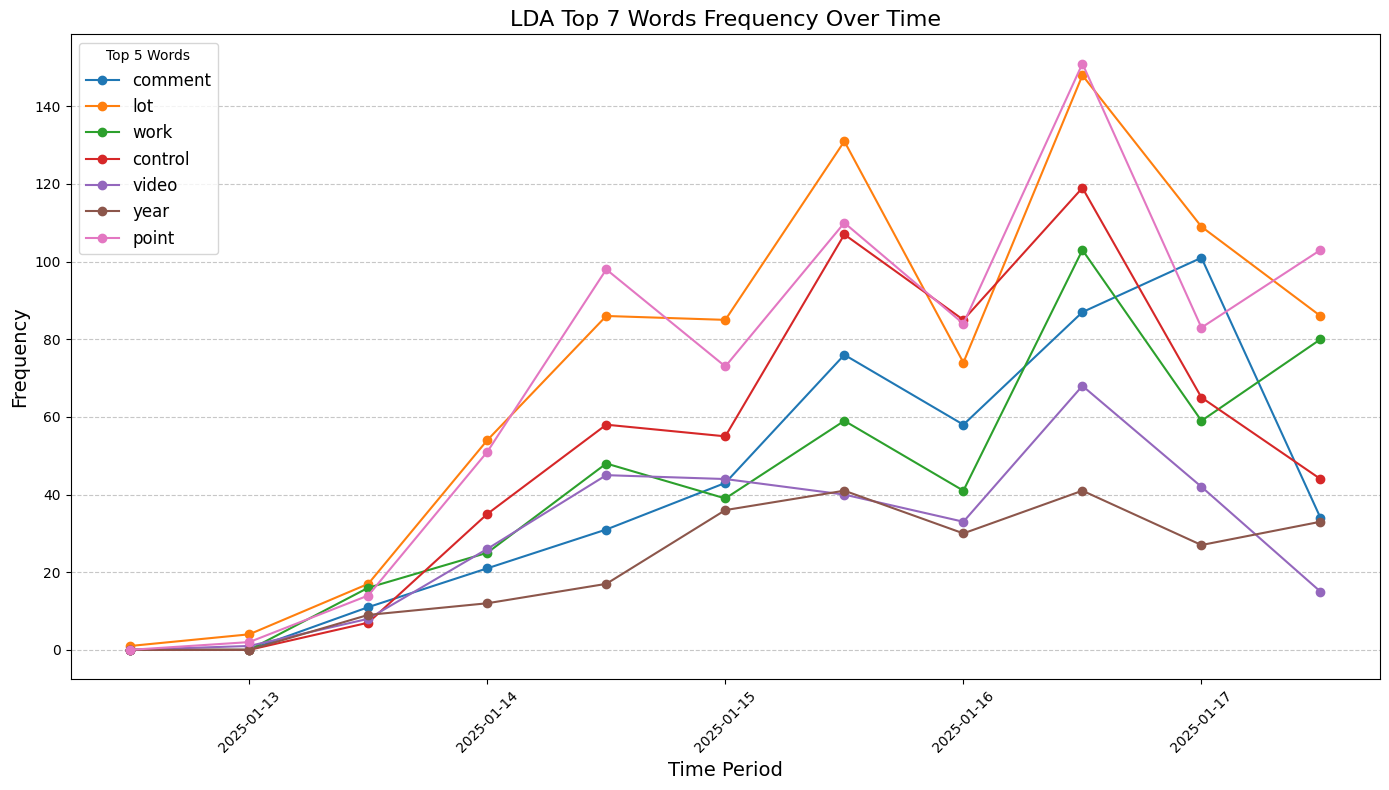

In [ ]:
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

def extract_top_words_from_lda(lda_model, num_topics, topn):
    """
	•	lda_model: The trained LDA model.
	•	num_topics (int): Number of topics in the model.
	•	topn (int): Number of keywords extracted for each topic.
    """
    overall_word_weights = defaultdict(float)
    for topic_id in range(num_topics):
        topic_words = lda_model.show_topic(topic_id, topn=topn)
        for word, weight in topic_words:
            overall_word_weights[word] += weight
    
    # 排序并提取前 topn 个关键词
    sorted_words = sorted(overall_word_weights.items(), key=lambda x: x[1], reverse=True)
    top_words = [word for word, _ in sorted_words[:topn]]
    return top_words

def analyze_lda_top_words_trends(df, content_column, time_column, top_words, time_interval='12H'):
    """
	•	df (pd.DataFrame): The dataset.
	•	content_column (str): Name of the column containing text content.
	•	time_column (str): Name of the column containing time data.
	•	top_words (list): List of high-frequency words.
	•	time_interval (str): Time interval (e.g., '12H' for every 12 hours).
    """
    df[time_column] = pd.to_datetime(df[time_column]) 
    df['time_period'] = df[time_column].dt.floor(time_interval) 

    trend_data = []
    for time_period, group in df.groupby('time_period'):
        words_in_period = " ".join(group[content_column].fillna("")).split()
        word_counts = Counter(words_in_period)
        for word in top_words:
            trend_data.append({
                'time_period': time_period,
                'word': word,
                'count': word_counts.get(word, 0)
            })
    
    return pd.DataFrame(trend_data)

def plot_lda_top_words_trends(trend_df, top_words):
    """
	•	trend_df (pd.DataFrame): A DataFrame containing the time series data of keyword frequencies.
	•	top_words (list): List of high-frequency words.
    """
    plt.figure(figsize=(14, 8))
    for word in top_words:
        word_data = trend_df[trend_df['word'] == word]
        plt.plot(word_data['time_period'], word_data['count'], marker='o', label=word)
    
    plt.title('LDA Top 7 Words Frequency Over Time', fontsize=16)
    plt.xlabel('Time Period', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend(title='Top 5 Words', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

lda_top_words = extract_top_words_from_lda(lda_model=lda_model, num_topics=lda_model.num_topics, topn=7)

trend_df = analyze_lda_top_words_trends(df, content_column='content', time_column='created', top_words=lda_top_words, time_interval='12H')
plot_lda_top_words_trends(trend_df, top_words=lda_top_words)

Top word per topic

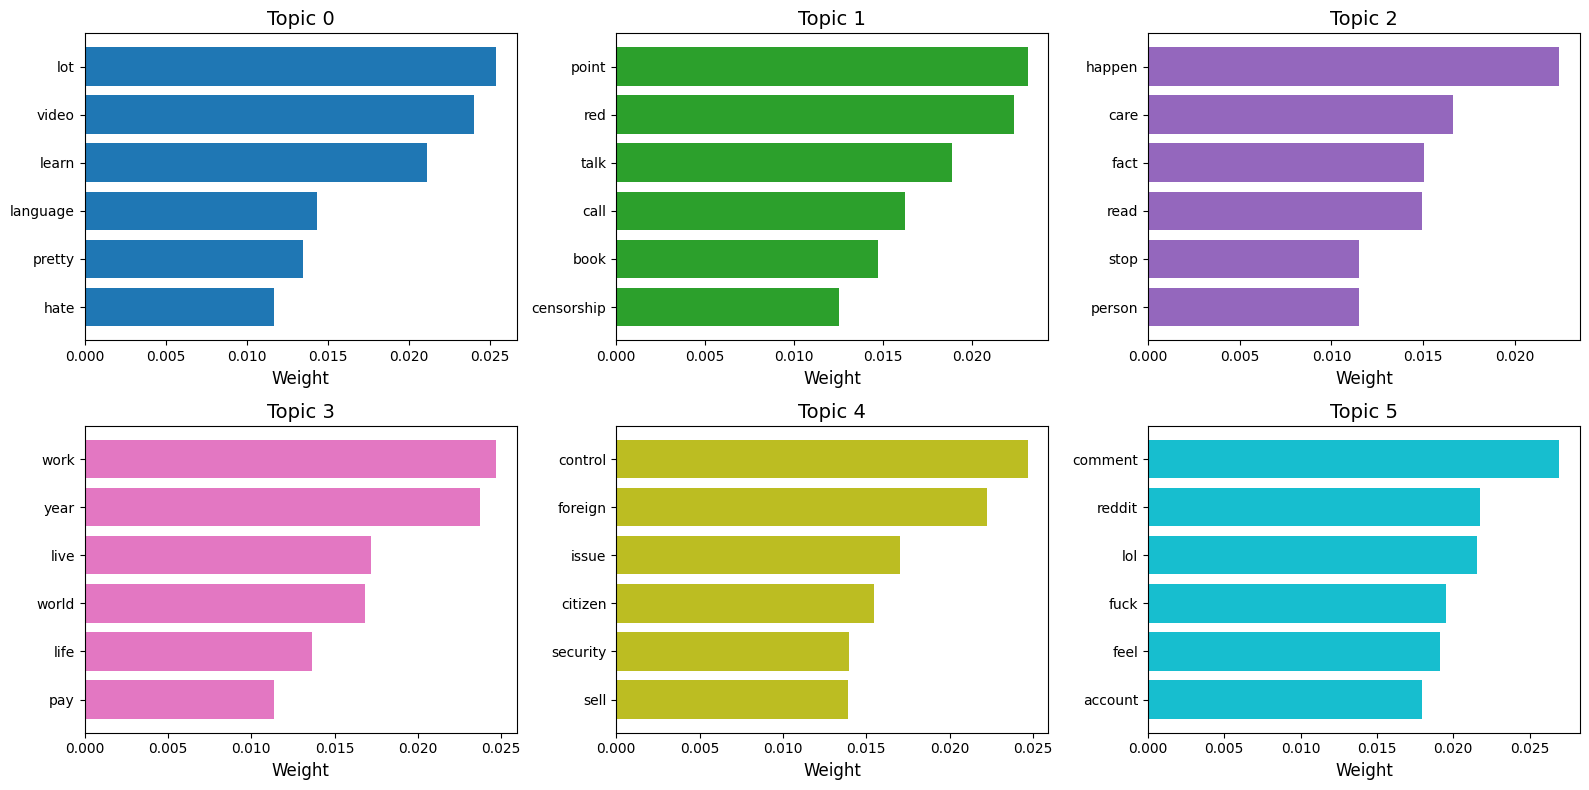

In [ ]:
import matplotlib.pyplot as plt

def get_top_words_per_topic(lda_model, num_topics=6, top_n=6):
    """
	•	lda_model: The trained LDA model.
	•	num_topics (int): Number of topics in the model.
	•	topn (int): Number of keywords extracted for each topic.
    """
    top_words = {}
    for topic_id in range(num_topics):
        # 获取主题的前 top_n 个关键词
        words = lda_model.show_topic(topic_id, topn=top_n)
        top_words[f"Topic {topic_id}"] = words
    return top_words

def visualize_top_words(top_words):
    """
	•	top_words (dict): Keywords and their weights for each topic.
    """
    num_topics = len(top_words)
    rows = 2 
    cols = 3  
    colors = plt.cm.tab10(np.linspace(0, 1, num_topics))  

    plt.figure(figsize=(16, 8)) 
    
    for i, (topic, words) in enumerate(top_words.items()):
        plt.subplot(rows, cols, i + 1)  
        terms, weights = zip(*words)
        plt.barh(terms, weights, color=colors[i])  
        plt.title(topic, fontsize=14)
        plt.xlabel('Weight', fontsize=12)
        plt.gca().invert_yaxis()  
    
    plt.tight_layout()
    plt.show()

top_words = get_top_words_per_topic(lda_model=ldamallet, num_topics=6, top_n=6)
visualize_top_words(top_words)